In [1]:
from matplotlib.pyplot import figure
import data_analysis
import pandas as pd
import matplotlib.pyplot as plot
import nltk
import random
import re
pd.set_option('display.max_rows', None)

#### Tokenize

In [2]:
token_list = data_analysis.get_tokens("Medical")
token_data = pd.DataFrame(token_list, columns=["tokens"])
token_data = token_data.groupby(["tokens"]).size().reset_index(name="count")
token_data = token_data.sort_values(["count", "tokens"], ascending=False).reset_index(drop=True)
print("Distinct tokens: {0}".format(len(token_data.index)))
token_data.head(20)

Distinct tokens: 5583


,tokens,count
0,dementia,443
1,risk,210
2,people,208
3,bladder,168
4,mscs,158
5,organoids,152
6,cells,144
7,studies,139
8,care,136
9,cognitive,132


#### Stemming

In [3]:
stemmed_token_list = data_analysis.stem(token_list)
stemmed_data = pd.DataFrame(stemmed_token_list, columns=["tokens"])
stemmed_data = stemmed_data.groupby(["tokens"]).size().reset_index(name="count")
stemmed_data = stemmed_data.sort_values(["count", "tokens"], ascending=False).reset_index(drop=True)
print("Distinct tokens: {0}".format(len(stemmed_data.index)))
stemmed_data.head(20)

Distinct tokens: 4029


,tokens,count
0,dementia,455
1,studi,235
2,risk,229
3,peopl,208
4,organoid,207
5,cell,206
6,msc,203
7,use,199
8,carer,189
9,cognit,177


<BarContainer object of 28 artists>

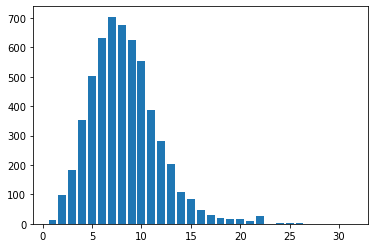

In [4]:
grouped_token_list = token_data["tokens"].values.tolist()
token_length_list = [len(token) for token in grouped_token_list]
token_count_data = pd.DataFrame(token_length_list, columns=["Length"])
token_count_data = token_count_data.groupby(["Length"]).size().reset_index(name="Count")
x = token_count_data["Length"].values.tolist()
y = token_count_data["Count"].values.tolist()
plot.bar(x, y)

<BarContainer object of 25 artists>

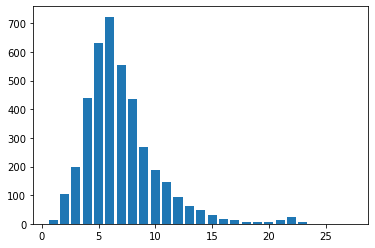

In [5]:
grouped_stemmed_token_list = stemmed_data["tokens"].values.tolist()
stemmed_length_list = [len(token) for token in grouped_stemmed_token_list]
stemmed_token_count_data = pd.DataFrame(stemmed_length_list, columns=["Length"])
stemmed_token_count_data = stemmed_token_count_data.groupby(["Length"]).size().reset_index(name="Count")
x = stemmed_token_count_data["Length"].values.tolist()
y = stemmed_token_count_data["Count"].values.tolist()
plot.bar(x, y)

#### Sentence Segmentation

<BarContainer object of 137 artists>

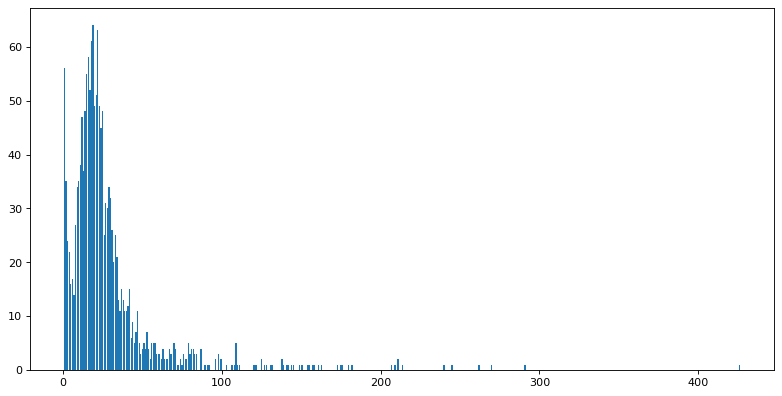

In [6]:
sentence_list = data_analysis.sentence_segment("Medical")
sentence_length_list = []

for sentence in sentence_list:
    word_list = sentence.split()
    count = 0

    if len(word_list) == 1 and not re.search('[a-zA-Z]', sentence):
        sentence_length_list.append(0)
        continue

    for word in word_list:
        if word.strip() != "":
            count += 1

    sentence_length_list.append(count)

sentence_length_data = pd.DataFrame(sentence_length_list, columns=["Length"])
sentence_length_data = sentence_length_data.groupby(["Length"]).size().reset_index(name="Count")
sentence_length_data = sentence_length_data[sentence_length_data["Length"] > 0]
x = sentence_length_data["Length"].values.tolist()
y = sentence_length_data["Count"].values.tolist()
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plot.bar(x, y)

#### POS Tagging

In [10]:
#nltk.download('averaged_perceptron_tagger')
selected_sentence_list = random.sample(sentence_list, 3)

for sentence in selected_sentence_list:
    print(sentence)
    tagged_list = nltk.pos_tag(data_analysis.get_tokens_from_sentence(sentence))

    for tag in tagged_list:
        print(tag)

    print("")

Education is crucial for the carer to understand that patients’ behaviour is not purposeful or meant to provoke.
('Education', 'NN')
('is', 'VBZ')
('crucial', 'JJ')
('for', 'IN')
('the', 'DT')
('carer', 'NN')
('to', 'TO')
('understand', 'VB')
('that', 'IN')
('patients', 'NNS')
('behaviour', 'VBP')
('is', 'VBZ')
('not', 'RB')
('purposeful', 'JJ')
('or', 'CC')
('meant', 'JJ')
('to', 'TO')
('provoke', 'VB')

This means applications of AI in medicine will be increasingly useful in aiding diagnosis and clinical treatment.
('This', 'DT')
('means', 'VBZ')
('applications', 'NNS')
('of', 'IN')
('AI', 'NNP')
('in', 'IN')
('medicine', 'NN')
('will', 'MD')
('be', 'VB')
('increasingly', 'RB')
('useful', 'JJ')
('in', 'IN')
('aiding', 'VBG')
('diagnosis', 'NN')
('and', 'CC')
('clinical', 'JJ')
('treatment', 'NN')

Recently, clinical trials have been undertaken to promote tracheal reconstruction using tracheal substitutes, including autologous grafts, homografts, and prostheses [179].
('Recently', 'RB